<a href="https://colab.research.google.com/github/RadhikaRM/Bookrecommendersystem/blob/main/Book_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Problem Statement**

In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).

Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

**Content**


The Book-Crossing dataset comprises 3 files.

● Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

● Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

● Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

In [352]:
#importing the required libraries
#Data wrangling
import numpy as np
import pandas as pd
#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
#To create wordcloud
from PIL import Image
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS
plt.rcParams["figure.figsize"] = (8,8)
from IPython.display import Image, HTML   #Displaying images

In [353]:
#loading the required datasets
books_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Project 4-Book Recommendation/Books.csv',low_memory=False)
rating_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Project 4-Book Recommendation/Ratings.csv',low_memory=False)
users_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Project 4-Book Recommendation/Users.csv',low_memory=False)

## **Taking a look at datasets**

In [354]:
users_df.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [355]:
books_df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg


In [356]:
rating_df.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [357]:
# shapes of all the datasets
print('Shape of Users: {}, Books: {} and Ratings: {}'.format(users_df.shape, books_df.shape, rating_df.shape))

Shape of Users: (278858, 3), Books: (271360, 8) and Ratings: (1149780, 3)


# **Books data**



---


###**Data Description**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.


In [358]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [359]:
print('This shape of Books datasheet is : ',books_df.shape)
print('='*30)
print('This shape of Ratings datasheet is : ',rating_df.shape)
print('='*30)
print('This shape of Users datasheet is : ',users_df.shape)

This shape of Books datasheet is :  (271360, 8)
This shape of Ratings datasheet is :  (1149780, 3)
This shape of Users datasheet is :  (278858, 3)


In [360]:
print(books_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None


In [361]:
books_df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,118,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/185326119X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/225307649X.01.LZZZZZZZ.jpg
freq,1,27,632,17627,7535,2,2,2


In [362]:
# Missing value percentage
print(books_df.isnull().sum()/len(books_df)*100)

ISBN                   0.000000
Book-Title             0.000000
Book-Author            0.000369
Year-Of-Publication    0.000000
Publisher              0.000737
Image-URL-S            0.000000
Image-URL-M            0.000000
Image-URL-L            0.001106
dtype: float64


In [363]:
# checking for data in missing info columns
books_df['Image-URL-L'].value_counts()

http://images.amazon.com/images/P/225307649X.01.LZZZZZZZ.jpg    2
http://images.amazon.com/images/P/044021145X.01.LZZZZZZZ.jpg    2
http://images.amazon.com/images/P/044991089X.01.LZZZZZZZ.jpg    2
http://images.amazon.com/images/P/039552105X.01.LZZZZZZZ.jpg    2
http://images.amazon.com/images/P/014062063X.01.LZZZZZZZ.jpg    2
                                                               ..
http://images.amazon.com/images/P/1860461050.01.LZZZZZZZ.jpg    1
http://images.amazon.com/images/P/0553213067.01.LZZZZZZZ.jpg    1
http://images.amazon.com/images/P/156971634X.01.LZZZZZZZ.jpg    1
http://images.amazon.com/images/P/349223674X.01.LZZZZZZZ.jpg    1
http://images.amazon.com/images/P/0767409752.01.LZZZZZZZ.jpg    1
Name: Image-URL-L, Length: 271041, dtype: int64

In [364]:
books_df['Book-Author'].value_counts()

Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
Linda Jackson           1  
Artiste C. Arthur       1  
Emily Pearl Kingsley    1  
Jean Cassels            1  
Christopher  Biffle     1  
Name: Book-Author, Length: 102023, dtype: int64

In [365]:
books_df['Publisher'].value_counts()

Harlequin                  7535
Silhouette                 4220
Pocket                     3905
Ballantine Books           3783
Bantam Books               3646
                           ... 
Hannover House             1   
Amber Quill Press, LLC.    1   
Lunchbox Press             1   
Ugly Town                  1   
Connaught                  1   
Name: Publisher, Length: 16807, dtype: int64

In [366]:
# data preparation
# Handling the missing categorical values
books_df['Book-Author'].fillna(value=books_df['Book-Author'].mode()[0], inplace=True)
books_df['Publisher'].fillna(value=books_df['Publisher'].mode()[0], inplace=True)
books_df['Image-URL-L'].fillna(value=books_df['Image-URL-L'].mode()[0], inplace=True)

In [367]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271360 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271360 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


# **Users Data**


---




###**Data description**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

In [368]:
#displaying the top 10 and bottom 10 rows of the dataframe
pd.concat([users_df.head(10),users_df.tail(10)],axis=0)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [369]:
#inspecting the columns in users_df
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


* There are records of 278858 users in this dataframe.There are 3 columns in this dataframe.
* The 'Age' column has null values

In [370]:
#Checking for duplicates in users_df
users_df[users_df['User-ID'].duplicated()].sum()

User-ID     0.0
Location    0.0
Age         0.0
dtype: float64

In [371]:
#Percentage of missing values in users_df
print(users_df.isnull().sum()/len(users_df)*100)

User-ID     0.000000 
Location    0.000000 
Age         39.719857
dtype: float64


* The 39.7% of values in the 'Age' column are missing/NaN values

In [372]:
#summarizing data in 'Age' column
users_df['Age'].describe()

count    168096.000000
mean     34.751434    
std      14.428097    
min      0.000000     
25%      24.000000    
50%      32.000000    
75%      44.000000    
max      244.000000   
Name: Age, dtype: float64

* The maximum value in the 'Age' column is 244. This is certainly an outlier.

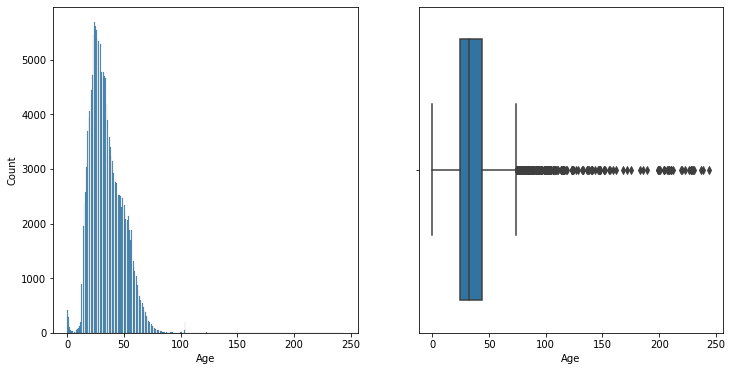

In [373]:
#Histogram showing distribution of ages
fig=plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(x='Age',data=users_df)

#boxplot of Age column
plt.subplot(1,2,2)
sns.boxplot(x='Age',data=users_df)

* Most of the users are from the age group 25-50
* It is highly unlikely to have users under the age of 4 and above 100.The peaks near 0 and 100 in the kdeplot indicates that there are some outlier values in the 'Age' column

It is highly unlikely to have users of age above 100 and below 4 in this case.So,let's replace these rows with median value of age

In [374]:
median_=users_df['Age'].median()
#replacing the outliers in 'Age' with NaN value
users_df.loc[(users_df['Age']>100)|(users_df['Age']<4),'Age']=np.nan

In [375]:
#replacing missing values (including  outliers) with the median age
users_df['Age'].fillna(median_,inplace=True)

In [376]:
#percentage of missing values in 'Age' column
(users_df['Age'].isnull().sum()/len(users_df))*100


0.0

The missing values in the 'Age' column have been imputed with the median value of Age.

Now let's inspect the 'Location' column.

In [377]:
#number of unique values in 'Location'
users_df['Location'].nunique()

57339

In [378]:
#extracting the country names from users_df
for i in users_df:
    users_df['Country']=users_df.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [379]:
#Displaying the country names
set(users_df['Country'])

{'',
 '01776',
 '02458',
 '19104',
 '23232',
 '30064',
 '85021',
 '87510',
 '_ brasil',
 'a',
 'aaa',
 'adsgfdr',
 'afghanistan',
 'ahrensburg',
 'alachua',
 'albania',
 'alderney',
 'algeria',
 'algérie',
 'allen',
 'ama lurra',
 'america',
 'american samoa',
 'andorra',
 'angola',
 'antarctica',
 'aotearoa',
 'argentina',
 'armenia',
 'aroostook',
 'aruba',
 'asturies',
 'auckland',
 'austbritania',
 'australia',
 'australii',
 'austria',
 'autralia',
 'az',
 'azerbaijan',
 'bademn würtemberg',
 'bahamas',
 'bahrain',
 'baltimore',
 'bangladesh',
 'barbados',
 'basilicata',
 'basque country',
 'bavaria',
 'baxter',
 'bbbzzzzz',
 'belarus',
 'belgi',
 'belgique',
 'belgium',
 'belize',
 'bell',
 'benin',
 'berguedà',
 'bermuda',
 'bernalillo',
 'bfe',
 'bhutan',
 'bih',
 'bkk',
 'bladen',
 'bolivia',
 'bosnia',
 'botswana',
 'brasil',
 'brazil',
 'brunei',
 'brunei darussalam',
 'bucks',
 'bulgaria',
 'buncombe',
 'burkina faso',
 'burkinafasu',
 'burlington',
 'burma',
 'butler',
 'c

In [380]:
#correcting the mispelled country names
users_df.loc[users_df['Country'].isin(['australii','autralia','western australia']), 'Country'] = 'australia'
users_df.loc[users_df['Country'].isin(['unite states','01776','02458','19104','23232','30064','85021','87510','united sates','united staes','united state','united statea','united stated','america'
                                      'united stated of america','united states','united states of america','us','us of a','us virgin islands',
                                      'usa  canada','usa currently living in england','uusa','usaa','wonderful usa','california','orange co']), 'Country'] = 'usa'
users_df.loc[users_df['Country'].isin(['united kindgdom', 'united kindgonm','united kingdom','u k']), 'Country'] = 'uk'  
users_df.loc[users_df['Country'].isin(['the philippines', 'philippines', 'philippinies', 'phillipines', 'phils', 'phippines']), 'Country'] = 'philippines'                                      
users_df.loc[users_df['Country'].isin(['','xxxxxx','universe','nowhere','x','y','a','öð¹ú','the','unknown',np.nan,'n/a','aaa','z','somewherein space']), 'Country'] = 'others'
users_df.loc[users_df['Country'].isin([ 'italia','italien','itlay']), 'Country'] = 'italy'
users_df.loc[users_df['Country'].isin([ ' china öð¹ú','chinaöð¹ú','chian']), 'Country'] = 'china'
users_df['Country'].replace([ 'the gambia','the netherlands','geermany','srilanka','saudia arabia','brasil','_ brasil','indiai','malaysian','hongkong','russian federation'], 
                            ['gambia','netherlands','germany','sri lanka','saudi arabia','brazil','brazil','india','malaysia','hong kong','russia'],inplace=True)
 


In [381]:
#Converting the country names to uppercase
users_df['Country']=users_df['Country'].str.upper()

In [382]:
#Dropping the column 'Location'
users_df.drop('Location',axis=1,inplace=True)

In [383]:
users_df.Country.value_counts()

USA           139746
CANADA        21658 
UK            18565 
GERMANY       17074 
SPAIN         13258 
              ...   
ALACHUA       1     
CHINA ÖÐ¹Ú    1     
MAROC         1     
MÉRIDA        1     
HERNANDO      1     
Name: Country, Length: 473, dtype: int64

## **Ratings data**


---



### **Data description**

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

In [384]:
#displaying the first 5 rows
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [385]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [386]:
# checking null values
rating_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [387]:
# checking for unique user ids and isbn values
print('Number of unique user ids is {} and ISBN no. is {}'.format(rating_df['User-ID'].nunique(), rating_df['ISBN'].nunique()))

Number of unique user ids is 105283 and ISBN no. is 340556




> *This means that many users are buying multiple books. Also some books are really famous and hence are bought by multiple users.*



In [388]:
# checking for duplicates
rating_df[rating_df.duplicated()].sum()

User-ID        0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64

In [389]:
# making all the ISBN no. uppercase
rating_df['ISBN'].apply(lambda x: x.upper())

0          034545104X 
1          0155061224 
2          0446520802 
3          052165615X 
4          0521795028 
              ...     
1149775    1563526298 
1149776    0679447156 
1149777    0515107662 
1149778    0590442449 
1149779    05162443314
Name: ISBN, Length: 1149780, dtype: object

In [390]:
# lets see if all the books in rating_df are also in books_df
rating_df_new = rating_df[rating_df['ISBN'].isin(books_df['ISBN'])]

In [391]:
print('Shape of rating_df: {} and rating_df_new: {}'.format(rating_df.shape, rating_df_new.shape))

Shape of rating_df: (1149780, 3) and rating_df_new: (1031136, 3)


In [392]:
# book ratings
rating_df_new['Book-Rating'].value_counts().reset_index()

,index,Book-Rating
0,0,647294
1,8,91804
2,10,71225
3,7,66402
4,9,60778
5,5,45355
6,6,31687
7,4,7617
8,3,5118
9,2,2375




> *We can see for explicit ratings that rating 8 is recieved by most number of books followed by rating 10.*
> *There are 647294 implicitely rated books.*



In [393]:
# most popular books
rating_df_new.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
215952,0971880107,2502
38570,0316666343,1295
70798,0385504209,883
7344,0060928336,732
32370,0312195516,723
87397,044023722X,647
21342,0142001740,615
145042,067976402X,614
133142,0671027360,586
93847,0446672211,585




> *but this contains both explicit and implicit rating, so we need to seperate them to get better idea.*



In [394]:
explicit_rating = rating_df_new[rating_df_new['Book-Rating'] != 0]
implicit_rating = rating_df_new[rating_df_new['Book-Rating'] == 0]
print('Shape of explicit rating: {} and implicit rating: {}'.format(explicit_rating.shape, implicit_rating.shape))

Shape of explicit rating: (383842, 3) and implicit rating: (647294, 3)


In [395]:
# most popular explicitely rated books
explicit_rating.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
21945,0316666343,707
117745,0971880107,581
38819,0385504209,487
18058,0312195516,383
4131,0060928336,320
68898,059035342X,313
12325,0142001740,307
51799,0446672211,295
47986,044023722X,281
57625,0452282152,278


In [396]:
# getting the book names corresponding to these ISBNs
isbn_nums = ['0316666343', '0971880107', '0385504209', '0312195516', '0060928336']
books_df[books_df['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
26,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg
408,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg
522,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.LZZZZZZZ.jpg
748,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.LZZZZZZZ.jpg




> *therefore the most popular book is 'The Lovely Bones: A Novel'*



## **Merging Datasets**

---






In [397]:
# for the rating dataset, we are only taking the explicit rating dataset

books_rating_df = pd.merge(books_df, explicit_rating, on='ISBN', how='inner')
df = pd.merge(books_rating_df, users_df, on='User-ID', how='inner')

In [398]:
#shape of the merged dataframe 'df'
df.shape

(383842, 12)

In [399]:
#displaying the top 3 rows of df
df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Age,Country
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,8,5,32.0,CANADA
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/074322678X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/074322678X.01.LZZZZZZZ.jpg,8,5,32.0,CANADA
2,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,http://images.amazon.com/images/P/0887841740.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0887841740.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0887841740.01.LZZZZZZZ.jpg,8,5,32.0,CANADA


In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383842 entries, 0 to 383841
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 383842 non-null  object 
 1   Book-Title           383842 non-null  object 
 2   Book-Author          383842 non-null  object 
 3   Year-Of-Publication  383842 non-null  object 
 4   Publisher            383842 non-null  object 
 5   Image-URL-S          383842 non-null  object 
 6   Image-URL-M          383842 non-null  object 
 7   Image-URL-L          383842 non-null  object 
 8   User-ID              383842 non-null  int64  
 9   Book-Rating          383842 non-null  int64  
 10  Age                  383842 non-null  float64
 11  Country              383842 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 38.1+ MB


In [401]:
#Number of users who have rated the books
df['User-ID'].nunique()

68091

In [402]:
#Number of books in the dataframe
df['ISBN'].nunique()

149836

## **Exploratory Data Analysis**

In [403]:
books_df.head(10)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0399135782.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0399135782.01.LZZZZZZZ.jpg
6,0425176428,What If?: The World's Foremost Military Historians Imagine What Might Have Been,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0425176428.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0425176428.01.LZZZZZZZ.jpg
7,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0671870432.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0671870432.01.LZZZZZZZ.jpg
8,0679425608,Under the Black Flag: The Romance and the Reality of Life Among the Pirates,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0679425608.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0679425608.01.LZZZZZZZ.jpg
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/074322678X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/074322678X.01.LZZZZZZZ.jpg


In [453]:
books_df.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [456]:
df1=books_df.groupby(['ISBN','Book-Title'],as_index=[False,False])['ISBN'].count().to_frame(name='Copies')
dup=df1[df1['Copies']>1].sort_values(by='Copies',ascending=False)
dup.index.values

array([('000225669X', 'One Thousand Chestnut Trees'),
       ('067168289X', 'IF THERE BE THORNS (Dollanger Saga (Paperback))'),
       ('067178546X', 'Blue Gold : A Novel from the NUMA Files'),
       ('067174674X', 'SECRETS CAN KILL (NANCY DREW FILES 1) : SECRETS CAN KILL (Nancy Drew Files)'),
       ('067174352X', 'The Wounded Sky (Star Trek, No 13)'),
       ('067174139X', 'Masks (Star Trek The Next Generation, No 7)'),
       ('067173685X', 'REMEMBER ME (REMEMBER ME)'),
       ('067172813X', 'JOYS OF YIDDISH'), ('067168390X', 'Lonesome Dove'),
       ('067166218X', 'POSTCARDS FRM EDGE'),
       ('067940337X', 'Megatrends for Women'),
       ('067165599X', 'RETIEF IN THE RUIN'),
       ('067165344X', 'Heroing Or, How He Wound Down the World'),
       ('067153145X', 'Basic Kafka'), ('067144171X', 'SOULS ON FIRE'),
       ('067125121X', 'Kane and Abel'), ('067103619X', 'Lake News'),
       ('067100767X', 'Rain'), ('067187120X', 'SEE I TOLD YOU SO'),
       ('067944243X', 'Sleeping Wit

In [451]:
df1=books_df.groupby(['ISBN','Book-Title','Book-Author','Publisher'],as_index=[False,False,False])['ISBN'].count().to_frame(name='Copies')
dup=df1[df1['Copies']>1].sort_values(by='Copies',ascending=False)
dup

,,,,Copies
ISBN,Book-Title,Book-Author,Publisher,
000225669X,One Thousand Chestnut Trees,Mira Stout,Harpercollins Publisher,2
067168289X,IF THERE BE THORNS (Dollanger Saga (Paperback)),V.C. Andrews,Pocket,2
067178546X,Blue Gold : A Novel from the NUMA Files,Clive Cussler,Pocket,2
067174674X,SECRETS CAN KILL (NANCY DREW FILES 1) : SECRETS CAN KILL (Nancy Drew Files),Carolyn Keene,Simon Pulse,2
067174352X,"The Wounded Sky (Star Trek, No 13)",Diane Duane,Star Trek,2
...,...,...,...,...
039505155X,"Selected Shorter Writings of Mark Twain (Riverside Editions, A58)",Mark Twain,Houghton Mifflin Company,2
039480001X,The Cat in the Hat,Dr. Seuss,Random House Books for Young Readers,2
039475929X,Babette's Feast &amp; Other Anecdotes of Destiny,Isak Dinesen,Vintage Books USA,2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Selected Poems                                                                       24
Little Women                                                                         23
Wuthering Heights                                                                    20
Adventures of Huckleberry Finn                                                       19
Dracula                                                                              19
                                                                                     ..
Combustion                                                                           1 
Sparks of Genius: The Thirteen Thinking Tools of the World's Most Creative People    1 
The Colonel                                                                          1 
Face Down Before Rebel Hooves                                                        1 
Dreamsnake                                                                           1 
Name: Book-Title, Length: 19625,

In [425]:
books_df['ISBN']=books_df['ISBN'].str.upper()
books_rating_df=pd.merge(books_df,explicit_rating,on='ISBN',how='inner')
books_rating_df[books_rating_df.duplicated()].drop_duplicates(inplace=True,keep='first')


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [426]:
books_

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,41385,0


In [337]:
rating_df['User-ID'].value_counts().describe()

count    105283.000000
mean     10.920851    
std      90.562825    
min      1.000000     
25%      1.000000     
50%      1.000000     
75%      4.000000     
max      13602.000000 
Name: User-ID, dtype: float64

In [335]:
rating_df.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [253]:
df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating',
       'Location', 'Age', 'Country'],
      dtype='object')

In [296]:
from IPython.display import Image, HTML   #Displaying images

In [306]:
group_df=df.groupby(['Book-Title','Image-URL-M']).agg(No_of_users=('User-ID','count'),avg_rating=('Book-Rating','mean'),avg_user_age=('Age','mean')).reset_index() 

In [333]:
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


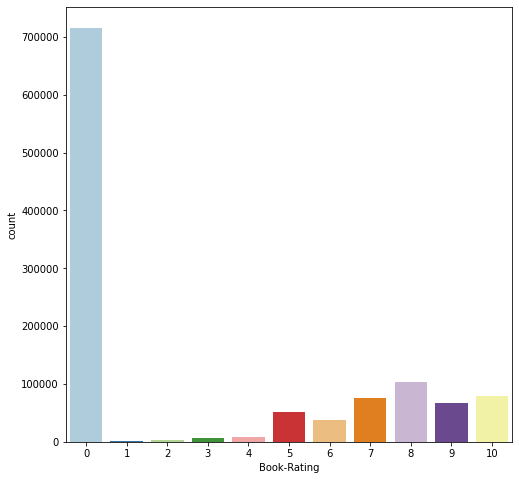

In [429]:
sns.countplot(rating_df['Book-Rating'],palette='Paired')

Text(0.5, 1.0, 'Most Popular books')

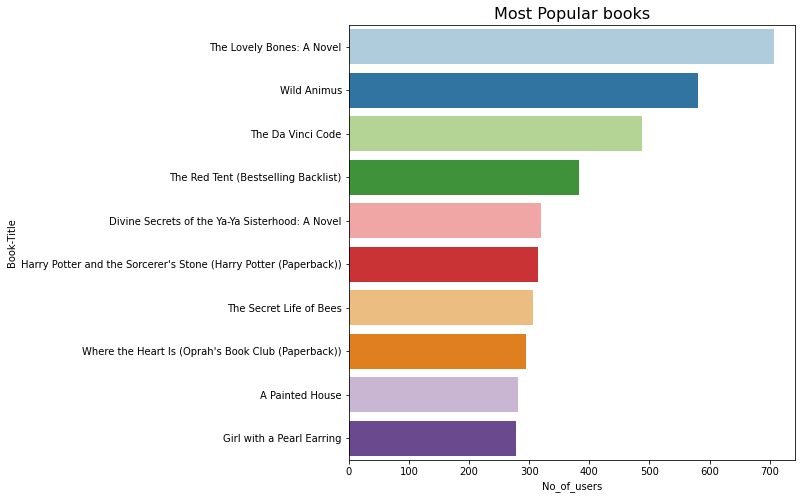

In [324]:
#Most popular books
top10_users=group_df.sort_values(by='No_of_users',ascending=False).head(10)
sns.barplot(x=top10_users['No_of_users'],y=top10_users['Book-Title'],palette='Paired')
plt.title('Most Popular books',size=16)

In [332]:
group_df['No_of_users'].unique()

array([  1,   7,   2,   4,   3,   5,   8,  13,   9,  16,  10,   6,  15,
        17,  18, 101,  11,  59, 177,  29,  24,  12,  90,  39,  52,  20,
        28,  26,  22,  50,  45, 109,  19,  14,  61, 134,  31,  27,  32,
        69,  42,  23,  58,  44, 144, 102,  83,  25, 111,  21,  81, 282,
        38, 181,  54,  43,  34,  74, 194,  35,  55, 106,  40, 124,  57,
        30,  77,  67, 132,  56,  41,  46,  79,  93,  63, 116, 151, 136,
        98, 269,  33,  92,  53,  36,  49,  51,  68, 130, 159,  88,  47,
       131,  78,  72, 113,  37,  95,  66,  80, 163,  99,  48,  60, 105,
        91, 320, 100,  70,  94,  89,  75,  73, 145, 117, 164, 127,  65,
       154,  62, 103,  86, 278, 118,  87, 236, 126, 189, 137, 110, 207,
       141, 133, 119, 315,  76,  71,  85,  64, 229, 104, 129, 230, 138,
        82, 200, 155, 226, 186, 108, 107, 153,  84,  96, 166, 150, 120,
       217, 112, 257, 158, 214, 115, 152, 243, 146, 487, 210, 242, 165,
        97, 161, 140, 707, 167, 183, 206, 143, 174, 272, 218, 13

Text(0.5, 1.0, 'Most Popular books')

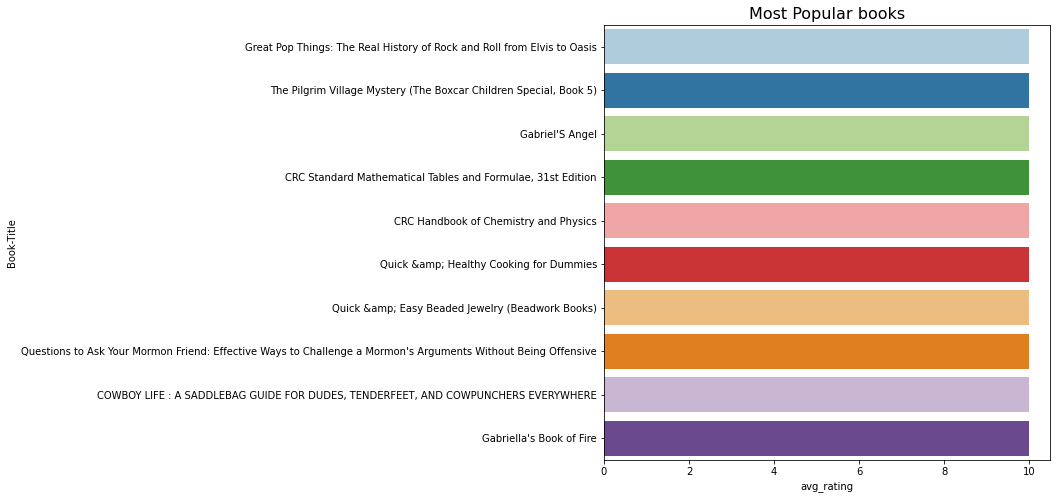

In [327]:
#Best rated books
top10_rating=group_df.sort_values(by='avg_rating',ascending=False).head(10)
sns.barplot(x=top10_rating['avg_rating'],y=top10_rating['Book-Title'],palette='Paired')
plt.title('Most Popular books',size=16)

In [300]:
top10_users

,Book-Title,Image-URL-S,No_of_users,avg_rating,avg_user_age,img_html
121767,The Lovely Bones: A Novel,http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg,707,8.185290,34.743989,"<img src=""http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg"" style=""max-height:124px;""></img><img src="""" style=""max-height:124px;""></img>"
146084,Wild Animus,http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg,581,4.390706,35.259897,"<img src=""http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg"" style=""max-height:124px;""></img><img src="""" style=""max-height:124px;""></img>"
113260,The Da Vinci Code,http://images.amazon.com/images/P/0385504209.01.THUMBZZZ.jpg,487,8.435318,37.318275,"<img src=""http://images.amazon.com/images/P/0385504209.01.THUMBZZZ.jpg"" style=""max-height:124px;""></img><img src="""" style=""max-height:124px;""></img>"
127024,The Red Tent (Bestselling Backlist),http://images.amazon.com/images/P/0312195516.01.THUMBZZZ.jpg,383,8.182768,35.020888,"<img src=""http://images.amazon.com/images/P/0312195516.01.THUMBZZZ.jpg"" style=""max-height:124px;""></img><img src="""" style=""max-height:124px;""></img>"
32925,Divine Secrets of the Ya-Ya Sisterhood: A Novel,http://images.amazon.com/images/P/0060928336.01.THUMBZZZ.jpg,320,7.887500,33.740625,"<img src=""http://images.amazon.com/images/P/0060928336.01.THUMBZZZ.jpg"" style=""max-height:124px;""></img><img src="""" style=""max-height:124px;""></img>"
49985,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),http://images.amazon.com/images/P/059035342X.01.THUMBZZZ.jpg,315,8.936508,31.457143,"<img src=""http://images.amazon.com/images/P/059035342X.01.THUMBZZZ.jpg"" style=""max-height:124px;""></img><img src="""" style=""max-height:124px;""></img>"
128459,The Secret Life of Bees,http://images.amazon.com/images/P/0142001740.01.THUMBZZZ.jpg,307,8.452769,36.921824,"<img src=""http://images.amazon.com/images/P/0142001740.01.THUMBZZZ.jpg"" style=""max-height:124px;""></img><img src="""" style=""max-height:124px;""></img>"
145111,Where the Heart Is (Oprah's Book Club (Paperback)),http://images.amazon.com/images/P/0446672211.01.THUMBZZZ.jpg,295,8.142373,34.308475,"<img src=""http://images.amazon.com/images/P/0446672211.01.THUMBZZZ.jpg"" style=""max-height:124px;""></img><img src="""" style=""max-height:124px;""></img>"
3297,A Painted House,http://images.amazon.com/images/P/044023722X.01.THUMBZZZ.jpg,282,7.340426,36.829787,"<img src=""http://images.amazon.com/images/P/044023722X.01.THUMBZZZ.jpg"" style=""max-height:124px;""></img><img src="""" style=""max-height:124px;""></img>"
46562,Girl with a Pearl Earring,http://images.amazon.com/images/P/0452282152.01.THUMBZZZ.jpg,278,7.982014,34.920863,"<img src=""http://images.amazon.com/images/P/0452282152.01.THUMBZZZ.jpg"" style=""max-height:124px;""></img><img src="""" style=""max-height:124px;""></img>"


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

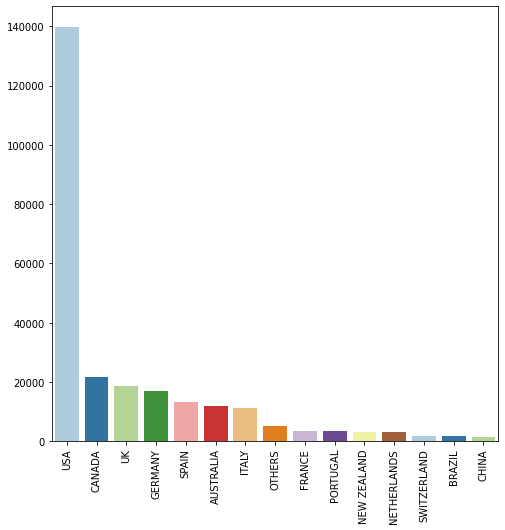

In [218]:
#Countries with maximum number of users
top10=users_df['Country'].value_counts().nlargest(15)
sns.barplot(x=top10.index,y=top10.values,palette='Paired')
plt.xticks(rotation=90)